# Exploratory Data Analysis
Using EDA I will analyse the data to identify trends and correlations between variables and the final grade.

> Import Student data.

In [ ]:
import pandas as pd

# Import student data
df = pd.read_csv('data/student/x.csv', sep=',')
df.head()

> Checking skewness of the final grade distribution

In [ ]:
# plot histogram of final grade (G3)
plt.hist(df['G3'])
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.title('Final Grade distribution')

data looks about normally distributed, with a modal score at around 11-12

> Feature Selection
* Correlation coefficient to determine most useuful variables

In [ ]:
# obtain variables with correlation to final grade and sort
df.corr()['G3'].sort_values()

anomalie: absences show positive correlation, where this should be expected as a negative correlation

> hot encodeing categorical variables

In [ ]:
# select categorical values only
categorical_df = df.select_dtypes('object')

# ensure there are no null values
categorical_df.isnull()

categorical_df.head()

In [ ]:
# One-hot encode
ohe_df = pd.get_dummies(categorical_df)


ohe_df['G3'] = df['G3']

# get correlations
ohe_df.corr()['G3'].sort_values()

> return most correlated variables including both numerical and categorical

In [ ]:
# return most correlated variables with the final grade
# parameters: df - data frame, size - amount of variables to retain
def getMostCorrelated(df, size):
    # One-Hot Encode Categorical Variables
    df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    greatest = df.corr().abs()['G3'].sort_values(ascending=False)
    
    # retain correlated variables according to size passed
    
    greatest = greatest[:size+1]
    print(greatest)
    
    df = df.loc[:, greatest.index]
    
    return df

In [ ]:
getMostCorrelated(df, 6)

> split the data into training and testing data

In [ ]:
# Split the data for training and testing
# split: 25%
from sklearn.model_selection import train_test_split

def split_data(df):
    X_train, X_test, y_train, y_test = train_test_split(df, df['G3'], test_size=0.25, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(getMostCorrelated(df, ))
X_train.head()

> Baseline metrics

In [122]:
import numpy as np

# get the median of the final grade
median_pred = X_train['G3'].median()
print(median_pred)

predictions = [median_pred for _ in range(len(X_test))]
print(predictions)


true_labels = X_test['G3']
print(true)

11.0
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
78     10
371    12
248     5
55     10
390     9
       ..
367     0
210     8
75     10
104    18
374    19
Name: G3, Length: 99, dtype: int64


final grade median: 11.0

In [125]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Display the naive baseline metrics

baseline_mae = mean_absolute_error(true_labels, predictions)
baseline_rmse = mean_squared_error(true_labels, predictions, squared=False)

print('Median Baseline  MAE: {:.4f}'.format(baseline_mae))
print('Median Baseline RMSE: {:.4f}'.format(baseline_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


> comparison of models against baseline

In [130]:
# Funciton taken from Towards data science
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

def evaluate_models(X_train, X_test, y_train, y_test):
    models = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']

    X_train = X_train.drop(columns='G3')
    X_test = X_test.drop(columns='G3')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = models)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        baseline_mae = mean_absolute_error(y_test, predictions)
        baseline_rmse = mean_squared_error(y_test, predictions, squared=False)
        
        # Insert results into the dataframe
        model_name = models[i]
        results.loc[model_name, :] = [baseline_mae, baseline_rmse]
        
        # Insert results into the dataframe
        model_name = models[i]
        results.loc[model_name, :] = [baseline_mae, baseline_rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [132]:
results = evaluate_models(X_train, X_test, y_train, y_test)
print(results)

                           mae     rmse
Linear Regression      1.20367   2.0784
ElasticNet Regression  1.17309  2.07094
Random Forest          1.39897  2.20823
Extra Trees            1.39113  2.28981
SVM                    1.49638  2.56948
Gradient Boosted       1.30689  2.16622
Baseline               3.78788  4.82523


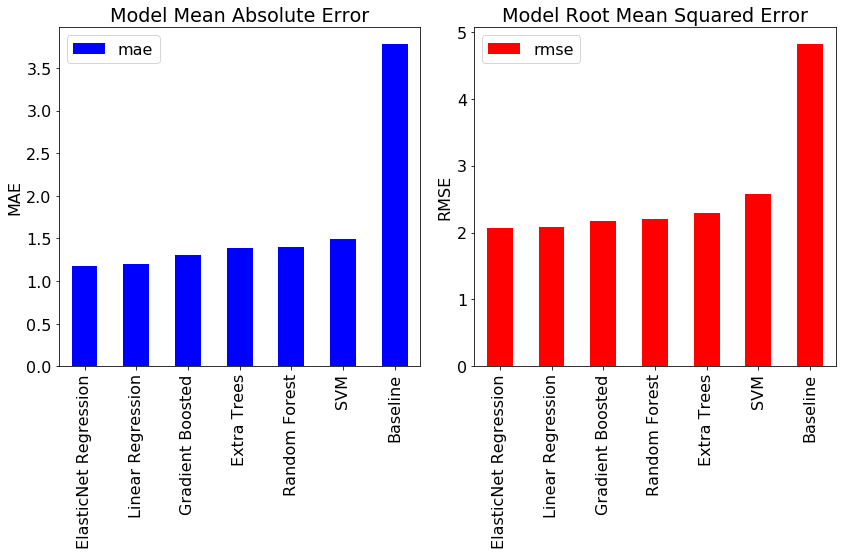

In [135]:
import matplotlib
from IPython.core.pylabtools import figsize
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

elastic net regression seems to work the best following linear regression